In [4]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as colors
# -*- coding: utf-8 -*-

read some data as example to plot

In [150]:
from netCDF4 import Dataset
import numpy as np 
f = Dataset('/sn3/wyu/grid_out/180319_ERAi_2004-2016_monthly_temp_rh.nc')
lon = f.variables['Lon'][:]
lat = f.variables['Lat'][:]
lev = f.variables['Lev'][:]
time = f.variables['Time'][:]
temp = f.variables['Temp'][:]
rh = f.variables['Deltah2o'][:]
var = temp.mean(axis=0)[2]
var2 = rh.mean(axis=0)[2]
var_vert = rh.mean(axis=0).mean(axis=-1)
# --------------randomly generate two 1-d arrays-------------
rand1 = np.random.randint(0,len(lon),20)
rand2 = np.random.randint(0,len(lat),20)
lon_rand,lat_rand,var_rand,var2_rand = lon[rand1],lat[rand2],var[rand2,rand1],var2[rand2,rand1]

In [228]:
'''
function to add an alphabetic order to a picture
input:
    ax: axes you want to add an order
    num: order of the figure, start from 0
    position: how many times higher than the y axis

2017.01.13
Wandi Yu
'''
def add_order(ax,num,position=0.025):
    x0,x1=ax.get_xlim()
    y0,y1=ax.get_ylim()
    text='('+chr(97+num)+')'    
    x=x0+(x1-x0)*0.005
    y=y1+(y1-y0)*position
    ax.text(x,y,text,size=15,weight='bold',family='serif')

# draw basemap using cartopy

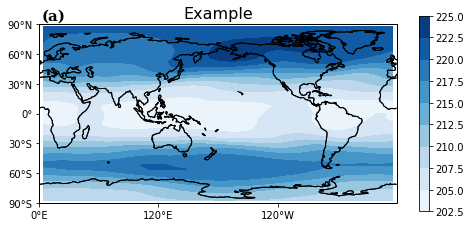

In [233]:
for i in range(1):
    plt.figure(figsize=[8,6])
    ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) 
    ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    #ax1.set_extent((0,359,-90,90))  
    #ax1.add_feature(cfeature.STATES, edgecolor='grey')
    #ax1.add_feature(cfeature.BORDERS, edgecolor='black')
    ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax1.set_global()
    ax1.set_yticks([t*30-90 for t in range(7)], crs=ccrs.PlateCarree())
    ax1.set_xticks([t*120 for t in range(3)], crs=ccrs.PlateCarree())
    plt.contourf(lon,lat,var,transform=ccrs.PlateCarree(),cmap='Blues')
    plt.colorbar(shrink=0.6)
    plt.title('Example',fontsize=16)
    add_order(plt.gca(),0)

# add another colormap 

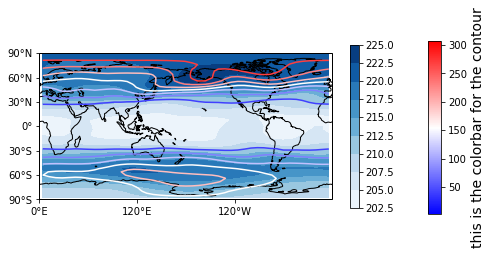

In [95]:
for i in range(1):
    fig = plt.figure(figsize=[8,6])
    ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) 
    ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.set_global()
    ax1.set_yticks([t*30-90 for t in range(7)], crs=ccrs.PlateCarree())
    ax1.set_xticks([t*120 for t in range(3)], crs=ccrs.PlateCarree())
    plt.contourf(lon,lat,var,transform=ccrs.PlateCarree(),cmap='Blues')
    plt.colorbar(shrink=0.5)
# ---------------------new below this line------------------
    cmap = cm.bwr
    plt.contour(lon,lat,var2,transform=ccrs.PlateCarree(),cmap=cmap)
# ---------------add another colorbar----------------    
    plt.subplots_adjust(right=0.76)
    cax = plt.axes([0.8, 0.3, 0.022, 0.4])
    norm = colors.Normalize(vmin=np.nanmin(var2), vmax=np.nanmax(var2))
    cb1 = colorbar.ColorbarBase(cax, cmap=cmap,norm=norm)
    cb1.set_label('this is the colorbar for the contour',fontsize=14)
    

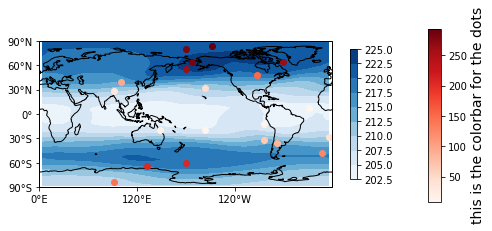

In [129]:
for i in range(1):
    fig = plt.figure(figsize=[8,6])
    ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) 
    ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.set_global()
    ax1.set_yticks([t*30-90 for t in range(7)], crs=ccrs.PlateCarree())
    ax1.set_xticks([t*120 for t in range(3)], crs=ccrs.PlateCarree())
    plt.contourf(lon,lat,var,transform=ccrs.PlateCarree(),cmap='Blues')
    plt.colorbar(shrink = 0.4)
# ---------------------new below this line------------------
    #------add some points, colormap shows value----------------
    cmap = cm.Reds
    colors_array = cmap((var2_rand-var2_rand.min())/(var2_rand.max()-var2_rand.min()))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    my_levels = np.linspace(var2_rand.min(),var2_rand.max(),11)
    for j in range(20):
        ax1.plot(lon_rand[j],lat_rand[j],\
           'o',color=rainbow[j],transform=ccrs.PlateCarree()) 
# ---------------add another colorbar----------------    
    plt.subplots_adjust(right=0.76)
    cax = plt.axes([0.8, 0.3, 0.022, 0.4])
    norm = colors.Normalize(vmin=np.nanmin(var2_rand), vmax=np.nanmax(var2_rand))
    cb1 = colorbar.ColorbarBase(cax, cmap=cmap,norm=norm)
    cb1.set_label('this is the colorbar for the dots',fontsize=14)
    

# draw wind field

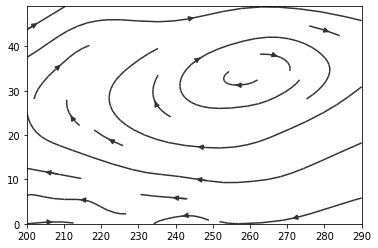

In [7]:
from glob import glob
import xarray as xr
for i in range(1):
    year,month = '2010','07'
    windFolder = '/co1/hao/reanlys_raw2nc/ECMWF_ERAi/winds/'
    fs = glob(windFolder+'ECMWF_ERAi_hybrid_6hr_UVQ_'+year+month+'??.nc')
    f = []
    for i in range(len(fs)):
        f += [xr.open_dataset(fs[i])]
    X=f[0].longitude.sel(longitude=slice(200,290)).values
    Y=f[0].latitude.sel(latitude=slice(0,49)).values
    U = xr.concat([f[i].u.sel(levels=26,latitude=slice(0,49),longitude=slice(200,290)) for i in range(len(fs))]\
              ,dim='time').mean(dim='time').values
    V = xr.concat([f[i].v.sel(levels=26,latitude=slice(0,49),longitude=slice(200,290)) for i in range(len(fs))]\
              ,dim='time').mean(dim='time').values
    plt.streamplot(X, Y, U, V, density=0.3, color='#333333')

# vertical distribution (using non-linear colorbar)

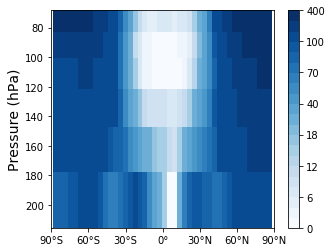

In [166]:
plt.figure(figsize=[5,4])
for i in range(1):
    # ------set the non-linear colorbar range-----------
    bounds = np.array([t*2 for t in range(10)]+[t*10+20 for t in range(9)]+[200,300,400])
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    plt.pcolormesh(lat,lev,var_vert,cmap='Blues',norm=norm)
    # ------make the vertical distribution figure --------------
    plt.gca().invert_yaxis()            # invert the y axis
    plt.ylabel('Pressure (hPa)',fontsize=14)  # add y label
    ds= u'\N{DEGREE SIGN}'   
    plt.xticks([x*30-90 for x in range(7)],[str(90-x*30)+ds+'S' for x in range(3)]\
               +['0'+ds]+[str(x*30+30)+ds+'N' for x in range(3)])    # set x ticks to latitude
    plt.colorbar()

# joint distribution of two variables

In [196]:
colors = ['k']
def joint_distribution(v1,v2,color,label,title):
    plt.plot(v1,v2,'o',color=color,label=label\
             +', r=%.4s'%np.corrcoef(v1,v2)[0,1])
#------add fit -----------------
    aa,bb = np.polyfit(v1,v2,1)
    plt.plot([v1.min(),v1.max()],[aa*v1.min()+bb,aa*v1.max()+bb],'k--')
    
    plt.xlabel('index 1',fontsize=14)
    plt.ylabel('index 2',fontsize=14)
    plt.title(title,fontsize=16)
    plt.legend()

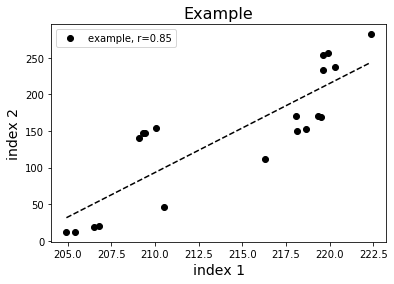

In [230]:
joint_distribution(var_rand,var2_rand,'k','example','Example')

# bar plot  

In [210]:
def barplot(x,my_title,labels,colors):
    my_width = 0.2
    ind = np.arange(2)/2
    plt.bar(ind,x[:,3],width = my_width ,bottom = x[:,2]+x[:,1]+x[:,0],label = labels[0], color = colors[0])
    plt.bar(ind,x[:,2],width = my_width ,bottom = x[:,1]+x[:,0],label = labels[1], color =colors[1])
    plt.bar(ind,x[:,1],width = my_width ,bottom = x[:,0],label = labels[2], color = colors[2])
    plt.bar(ind,x[:,0],width = my_width,label = labels[3],color = colors[3])

    for i in range(4):
        plt.plot([my_width/2.,ind[1]-my_width/2],np.sum(x[:,:(i+1)],axis=1),'k--')
        plt.text(ind.mean()-0.04,x[:,i].sum()/4+x[:,:i].sum()/2,'+'+str(int(np.round((x[1,i]\
                                                                        -x[0,i])/x[0,0]*100)))+'%')
        plt.text(ind[0]-0.04,x[0,i].sum()/2+x[0,:i].sum(),f"{x[0,i]:.2f}")
        plt.text(ind[1]-0.04,x[1,i].sum()/2+x[1,:i].sum(),f"{x[1,i]:.2f}")
    plt.text(ind[0]-0.06,x[0,4]+0.02,f"{x[0,4]:.2f}",fontsize=15)
    plt.text(ind[1]-0.06,x[1,4]+0.02,f"{x[1,4]:.2f}",fontsize=15)
    plt.text(ind.mean()-0.05,x[:,4].mean()+0.1,'+'+str(int(np.round((x[1,4]\
                                                            -x[0,4])/x[0,4]*100)))+'%')
    plt.legend()
    
    my_xticks = ['2000s','2090s']
    plt.ylabel('net contribution (ppmv)',fontsize=15)
    plt.xticks(ind,my_xticks,fontsize=15);
    plt.title(my_title,fontsize =15)
    plt.ylim([0,2.5])
    

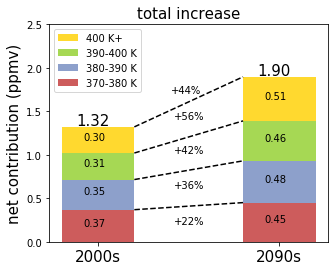

In [211]:
x = np.array([[0.3691104 , 0.3465309 , 0.3052074 , 0.30036651, 1.3212152 ],
       [0.450561  , 0.48007155, 0.45941006, 0.50670057, 1.89674318]])
labels = ['400 K+','390-400 K','380-390 K','370-380 K']
colors = ['#ffd92f','#a6d854','#8da0cb','IndianRed']
plt.figure(figsize=[5,4])
barplot(x,'total increase',labels,colors)

# left and right x-axis

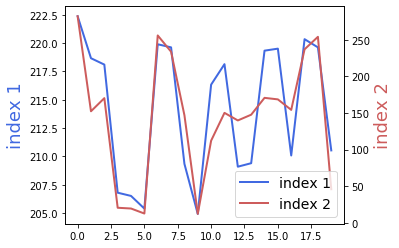

In [213]:
fig, ax1 = plt.subplots(figsize=[5,4])
ax2 = ax1.twinx()
line1 = ax1.plot(var_rand,label='index 1',color='royalblue',linewidth=2)
line2 = ax2.plot(var2_rand,label='index 2',color='indianred',linewidth=2)
ax1.set_ylabel('index 1',fontsize=18,color='royalblue')
ax2.set_ylabel('index 2',fontsize=18,color='indianred')
plt.legend(line1+line2,['index 1','index 2'],fontsize=14)

# add legend outside of the figure

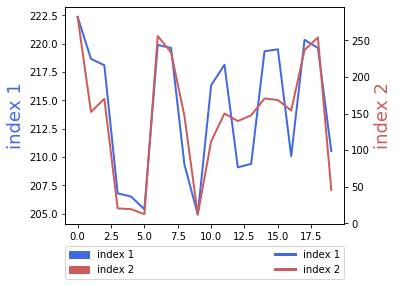

In [219]:
fig, ax1 = plt.subplots(figsize=[5,4])
ax2 = ax1.twinx()
line1 = ax1.plot(var_rand,label='index 1',color='royalblue',linewidth=2)
line2 = ax2.plot(var2_rand,label='index 2',color='indianred',linewidth=2)
ax1.set_ylabel('index 1',fontsize=18,color='royalblue')
ax2.set_ylabel('index 2',fontsize=18,color='indianred')

# -------define the patches------------------
patch1 = mpatches.Patch(color='royalblue', label='index 1')
patch2 = mpatches.Patch(color='indianred', label='index 2')
# -------or define lines -----------------
line1 = mlines.Line2D([], [], color='royalblue', linestyle='-',
                          linewidth=3, label='index 1')
line2 = mlines.Line2D([], [], color='indianred', linestyle='-',
                          linewidth=3, label='index 2')
# ---------add the legend-------------------------
plt.legend(handles=[patch1,patch2,line1,line2],\
    bbox_to_anchor=(0, -0.25, 1.0, -0), loc=3,\
    ncol=2, mode="expand", borderaxespad=0.)